In [6]:
from pytrends.request import TrendReq

#Create a pytrends object. request data from google trends
pytrends = TrendReq(hl='en-US')

#Extract data about kewords
keywords = ["Python", "R", "C++", "Java", "HTML"]
pytrends.build_payload(keywords, timeframe='today 5-y')

#Specify and get data
data = pytrends.interest_over_time()
data

,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2017-03-26,22,63,81,36,18,False
2017-04-02,20,65,79,34,18,False
2017-04-09,19,64,79,33,16,False
2017-04-16,19,60,81,35,17,False
2017-04-23,20,62,80,34,17,False
...,...,...,...,...,...,...
2022-02-20,27,50,85,20,11,False
2022-02-27,26,50,85,21,11,False
2022-03-06,28,52,85,21,12,False


In [2]:
type(data)

pandas.core.frame.DataFrame

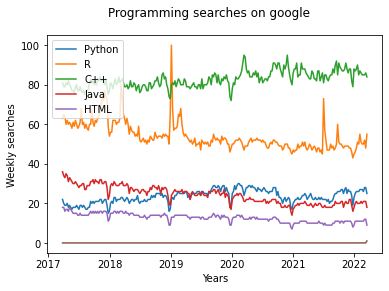

In [13]:
import matplotlib.pyplot as plt

plt.plot(data)

#Add tutle
plt.suptitle("Programming searches on google")
plt.xlabel("Years")
plt.ylabel("Weekly searches")


#Add legend
plt.legend(keywords, loc='upper left')

#Show plot
plt.savefig("data.png")


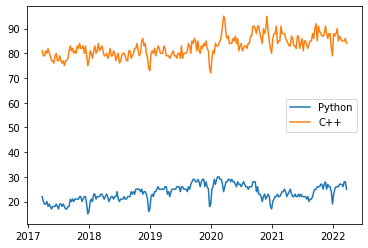

In [16]:
#Analyze data
focus = ["Python", "C++"]
plt.plot(data[focus])
plt.legend(focus)

In [25]:
#extract country level data about the keywords
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

data2 = data2['Python'].nlargest(10)
data2

geoName
China          50
Eritrea        39
Israel         35
St. Helena     29
Singapore      25
South Korea    25
Russia         22
Hong Kong      21
Iceland        21
Taiwan         21
Name: Python, dtype: int32

In [26]:
type(data2)

pandas.core.series.Series

In [27]:
#Convert to dataframe
data2 = data2.to_frame()
data2

,Python
geoName,
China,50
Eritrea,39
Israel,35
St. Helena,29
Singapore,25
South Korea,25
Russia,22
Hong Kong,21
Iceland,21


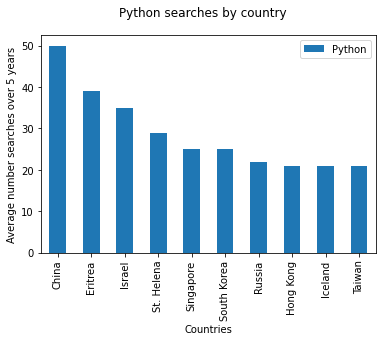

In [30]:
#Plot bar chart with pandas
data2.plot(kind='bar')

#add titles
plt.suptitle('Python searches by country')
plt.xlabel('Countries')
plt.ylabel('Average number searches over 5 years')
plt.show()

In [31]:
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,15,14,47,15,9
Curaçao,7,33,48,6,6
Cyprus,14,22,45,11,8
Czechia,15,23,41,13,8
Côte d’Ivoire,5,17,51,22,5


<AxesSubplot:xlabel='geoName'>

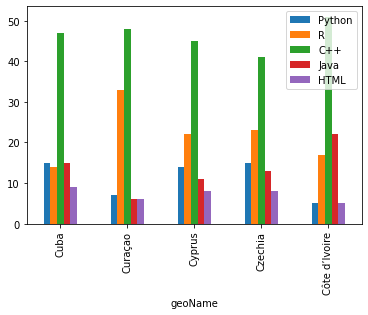

In [32]:
data3.plot(kind='bar')